In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import glob

In [20]:
## uni = file name
uni = "pid"

path = "/home/chyoo/work/KNO_reconstruction/KNO_pid/result/*" + uni +"*/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]

In [21]:
for i in range(len(train_list)):
    print(np.sort(np.array(train_list))[i].split('/')[-2])

khu2_pid_elec1_mu0_128_16h_100n_20l_one_gpu_scheduler
khu2_pid_elec1_mu0_16_4h_1000n_5l
khu2_pid_elec1_mu0_16_4h_200n_10l_one_gpu
khu2_pid_elec1_mu0_16_4h_200n_15l_one_gpu
khu2_pid_elec1_mu0_16_4h_200n_15l_one_gpu_scheduler
khu2_pid_elec1_mu0_32_4h_100n_15l_one_gpu
khu2_pid_elec1_mu0_32_4h_100n_15l_one_gpu_scheduler
khu2_pid_elec1_mu0_64_4h_1000n_15l_0314
khu2_pid_elec1_mu0_64_4h_1500n_15l_0315
khu2_pid_elec1_mu0_64_8h_100n_15l_one_gpu_scheduler
khu2_pid_elec1_mu0_64_8h_100n_20l_one_gpu_scheduler


In [22]:
# train_list = [

#               '/home/chyoo/work/KNO_reconstruction/KNO_pid/result/khu2_pid_elec1_mu0_64_4h_1000n_15l_0314/train.csv',

#               '/home/chyoo/work/KNO_reconstruction/KNO_pid/result/khu2_pid_elec1_mu0_128_16h_100n_20l_one_gpu_scheduler/train.csv',]

0 80  /  MTL = 0.1157926  /  MTL epoch = 0068  /  0.0807378  /  ACC = 0.9705404870322708  /  max acc = 0.9705404870322708  /  khu2_pid_elec1_mu0_16_4h_1000n_5l
1 136  /  MTL = 0.0307182  /  MTL epoch = 0131  /  0.0892825  /  ACC = 0.9676697683627004  /  max acc = 0.9696495743417144  /  khu2_pid_elec1_mu0_16_4h_200n_10l_one_gpu
2 65  /  MTL = 0.0486707  /  MTL epoch = 0062  /  0.0928344  /  ACC = 0.9652742031280934  /  max acc = 0.9668580479113048  /  khu2_pid_elec1_mu0_16_4h_200n_15l_one_gpu
3 81  /  MTL = 0.0744613  /  MTL epoch = 0079  /  0.1055889  /  ACC = 0.9627004553553752  /  max acc = 0.9632152049099189  /  khu2_pid_elec1_mu0_32_4h_100n_15l_one_gpu
4 204  /  MTL = 0.0458623  /  MTL epoch = 0094  /  0.0837133  /  ACC = 0.9685804791130468  /  max acc = 0.970698871510592  /  khu2_pid_elec1_mu0_16_4h_200n_15l_one_gpu_scheduler
5 317  /  MTL = 0.0687732  /  MTL epoch = 0193  /  0.0992362  /  ACC = 0.961136408631954  /  max acc = 0.961136408631954  /  khu2_pid_elec1_mu0_32_4h_100n_15

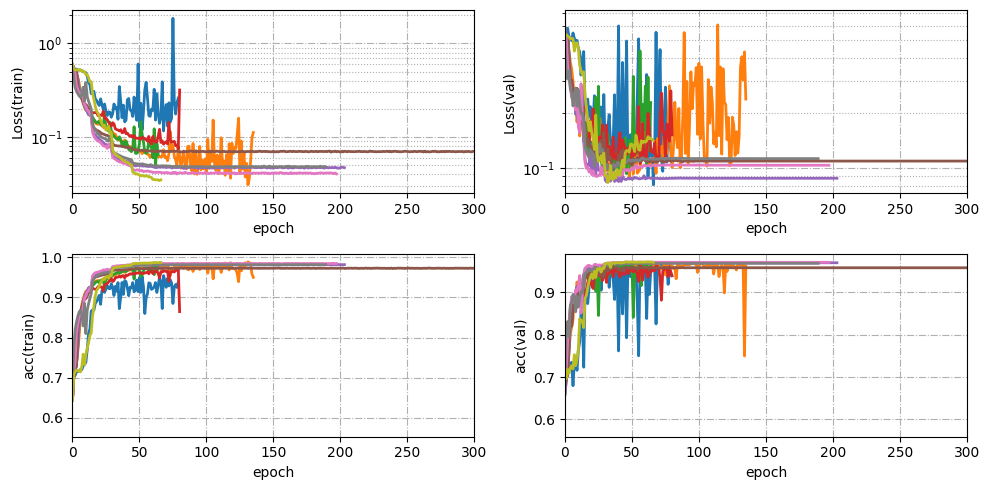

In [23]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

ax1 = plt.subplot(2, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(2, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')
ax3 = plt.subplot(2, 2, 3, ylabel='acc(train)', xlabel='epoch')
ax4 = plt.subplot(2, 2, 4, ylabel='acc(val)', xlabel='epoch')

for ax in (ax1, ax2,ax3,ax4):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([0,300])

lines, labels = [], []

for i in range(len(train_list)):
    df = pd.read_csv(train_list[i])

    label = train_list[i]
    l =  ax1.plot(df['loss'], linewidth=2,label=label.split('/')[-2]) 
    ax2.plot(df['val_loss'], linewidth=2,label=label.split('/')[-2])
    ax3.plot(df['acc'], linewidth=2,label=label.split('/')[-2])
    ax4.plot(df['val_acc'], linewidth=2,label=label.split('/')[-2])

    print(i,
        len(df['loss']),
        ' / ',
        "MTL = " + f"{df['loss'].min():.7f}",
        " / ",
        "MTL epoch = " + str("{:04}".format(np.where(df['loss']==df['loss'].min())[0][0])),
        " / ",
        f"{df['val_loss'].min():.7f}",
        " / ",
        "ACC = " + str("{:04}".format(df['val_acc'][np.where(df['val_loss']==df['val_loss'].min())[0][0]])),
        " / ",
        "max acc = " + str("{:04}".format(df['val_acc'].max())),
        " / ",
        label.split('/')[-2])

    lines.append(l[0])
    labels.append(label)
plt.tight_layout()
# plt.savefig('acc_loss.png',dpi=300)
# plt.legend()
plt.show()
plt.close()

In [24]:
!pwd

/home/chyoo/work/KNO_reconstruction/KNO_pid
